**ML Challenge** 

    Find an interesting dataset (you can also use the Boston housing dataset as discussed in the lecture) or look around (see e.g. kaggle.com) to perform regression on.

Alright - this time I'll load in simulated collision data from LHC. You can download it here: https://drive.google.com/file/d/1m_JQs8nt8jXbDFAQPG__Azz0AvzOYHxV/view?usp=sharing

It has the following description:

The data consist of 162500/160650 (train/test) simulated particle collisions and interactions in the ATLAS detector, situated at CERN's LHC accelerator ourside Geneva. Colliding protons, one is interested in collisions, which produce e.g. electrons (as thus new particles decaying to electrons must have been produced, since there are no electrons inside protons). Electrons interact in a particular way in the detector, leaving a distinct signature different signature than other particles. Each candidate in the file is described by 166 variables.
As the data is simulated, the "ground truth" is known, and we thus have perfect labels (for both particle type and energy), which we can use for the supervised training.

In [1]:
import h5py
import pandas as pd
import numpy as np

def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        return pd.DataFrame(f['train'][:], dtype=np.float64)
data = load_data('LHC_electrons')
data = data.loc[data['Truth'] == 1,:].reset_index(drop = True)
data.shape

(121495, 166)

OK. So we have 166 variables, where two is truth variables

"Truth" - either 0 or 1, where 1 indicates that it is an electron.

"p_truth_E" - which is the energy of the electron in GeV. 

This means that you can use this dataset for both regression and classification  - but we'll focus on regression here.

However, we can only use 160 of these as training input (the additional 4 is simulation meta data that we shouldn't use). I've listed the correct input variables below.

We could plot all variables and look at them manually, but that would be quite taxing given that we have 162 variables. Let's first reduce the data using PCA and use the "explained variance" from Philipps lecture to decide how many dimensions we need. Let's start by making sure we don't mix truth variables and input data.

In [2]:
truth_column = 'p_truth_E'
data = data.loc[data[truth_column] != -999.0,:].reset_index(drop = True)
input_columns = ['actualInteractionsPerCrossing',
'averageInteractionsPerCrossing',
'correctedActualMu',
'correctedAverageMu',
'correctedScaledActualMu',
'correctedScaledAverageMu',
'NvtxReco',
'p_nTracks',
'p_pt_track',
'p_eta',
'p_phi',
'p_charge',
'p_qOverP',
'p_z0',
'p_d0',
'p_sigmad0',
'p_d0Sig',
'p_EptRatio',
'p_dPOverP',
'p_z0theta',
'p_etaCluster',
'p_phiCluster',
'p_eCluster',
'p_rawEtaCluster',
'p_rawPhiCluster',
'p_rawECluster',
'p_eClusterLr0',
'p_eClusterLr1',
'p_eClusterLr2',
'p_eClusterLr3',
'p_etaClusterLr1',
'p_etaClusterLr2',
'p_phiClusterLr2',
'p_eAccCluster',
'p_f0Cluster',
'p_etaCalo',
'p_phiCalo',
'p_eTileGap3Cluster',
'p_cellIndexCluster',
'p_phiModCalo',
'p_etaModCalo',
'p_dPhiTH3',
'p_R12',
'p_fTG3',
'p_weta2',
'p_Reta',
'p_Rphi',
'p_Eratio',
'p_f1',
'p_f3',
'p_Rhad',
'p_Rhad1',
'p_deltaEta1',
'p_deltaPhiRescaled2',
'p_TRTPID',
'p_TRTTrackOccupancy',
'p_numberOfInnermostPixelHits',
'p_numberOfPixelHits',
'p_numberOfSCTHits',
'p_numberOfTRTHits',
'p_numberOfTRTXenonHits',
'p_chi2',
'p_ndof',
'p_SharedMuonTrack',
'p_E7x7_Lr2',
'p_E7x7_Lr3',
'p_E_Lr0_HiG',
'p_E_Lr0_LowG',
'p_E_Lr0_MedG',
'p_E_Lr1_HiG',
'p_E_Lr1_LowG',
'p_E_Lr1_MedG',
'p_E_Lr2_HiG',
'p_E_Lr2_LowG',
'p_E_Lr2_MedG',
'p_E_Lr3_HiG',
'p_E_Lr3_LowG',
'p_E_Lr3_MedG',
'p_ambiguityType',
'p_asy1',
'p_author',
'p_barys1',
'p_core57cellsEnergyCorrection',
'p_deltaEta0',
'p_deltaEta2',
'p_deltaEta3',
'p_deltaPhi0',
'p_deltaPhi1',
'p_deltaPhi2',
'p_deltaPhi3',
'p_deltaPhiFromLastMeasurement',
'p_deltaPhiRescaled0',
'p_deltaPhiRescaled1',
'p_deltaPhiRescaled3',
'p_e1152',
'p_e132',
'p_e235',
'p_e255',
'p_e2ts1',
'p_ecore',
'p_emins1',
'p_etconeCorrBitset',
'p_ethad',
'p_ethad1',
'p_f1core',
'p_f3core',
'p_maxEcell_energy',
'p_maxEcell_gain',
'p_maxEcell_time',
'p_maxEcell_x',
'p_maxEcell_y',
'p_maxEcell_z',
'p_nCells_Lr0_HiG',
'p_nCells_Lr0_LowG',
'p_nCells_Lr0_MedG',
'p_nCells_Lr1_HiG',
'p_nCells_Lr1_LowG',
'p_nCells_Lr1_MedG',
'p_nCells_Lr2_HiG',
'p_nCells_Lr2_LowG',
'p_nCells_Lr2_MedG',
'p_nCells_Lr3_HiG',
'p_nCells_Lr3_LowG',
'p_nCells_Lr3_MedG',
'p_pos',
'p_pos7',
'p_poscs1',
'p_poscs2',
'p_ptconeCorrBitset',
'p_ptconecoreTrackPtrCorrection',
'p_r33over37allcalo',
'p_topoetconeCorrBitset',
'p_topoetconecoreConeEnergyCorrection',
'p_topoetconecoreConeSCEnergyCorrection',
'p_weta1',
'p_widths1',
'p_widths2',
'p_wtots1',
'p_e233',
'p_e237',
'p_e277',
'p_e2tsts1',
'p_ehad1',
'p_emaxs1',
'p_fracs1',
'p_DeltaE',
'p_E3x5_Lr0',
'p_E3x5_Lr1',
'p_E3x5_Lr2',
'p_E3x5_Lr3',
'p_E5x7_Lr0',
'p_E5x7_Lr1',
'p_E5x7_Lr2',
'p_E5x7_Lr3',
'p_E7x11_Lr0',
'p_E7x11_Lr1',
'p_E7x11_Lr2',
'p_E7x11_Lr3',
'p_E7x7_Lr0',
'p_E7x7_Lr1']

Let's split the data into test, training and validation sets

In [3]:
from sklearn.model_selection import train_test_split
data_train, data_split_this_into_test_validation = train_test_split(data, test_size=0.30, random_state=42)
data_validate, data_test = train_test_split(data_split_this_into_test_validation, test_size=0.50, random_state=42)

Let's compute PC's

Text(0.5, 0, 'PCA component')

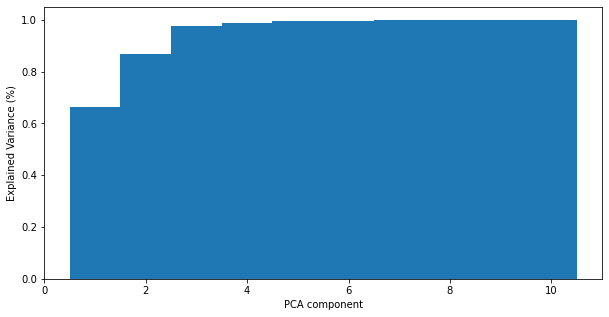

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
p = PCA(n_components=10, whiten = True)
p.fit(data_train[input_columns])
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.bar(np.arange(p.n_components)+1, np.cumsum(p.explained_variance_ratio_), width=1, label='cumulative')
ax.set_ylabel('Explained Variance (%)')
ax.set_xlabel('PCA component')

OK - so it looks like we can explain the data (with little to no loss of information) by using just 4 dimensions. Let's transform the input data and make plots.

In [5]:
data_train_transformed = p.transform(data_train[input_columns])
data_test_transformed = p.transform(data_test[input_columns])
data_validate_transformed = p.transform(data_validate[input_columns])
data_train_transformed.shape

(85046, 10)

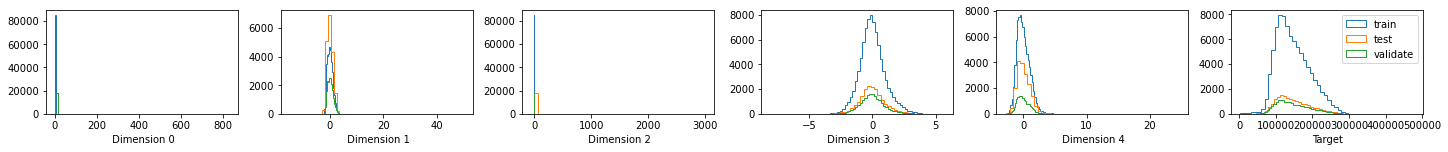

In [6]:
n_dimensions = 5
bins = 50
fig, ax = plt.subplots(1, 6, constrained_layout=True, figsize = (20,2))
c = 0
for column in range(5):
    ax[c].hist(data_train_transformed[:,column], bins = bins, label = 'train', histtype = 'step')
    ax[c].hist(data_validate_transformed[:,column], bins = bins, label = 'validate', histtype = 'step')
    ax[c].hist(data_test_transformed[:,column], bins = bins, label = 'test', histtype = 'step')
    ax[c].set_xlabel(f" Dimension {column}")
    c = c + 1
ax[c].hist(data_train[truth_column], bins = bins, label = 'train', histtype = 'step')
ax[c].hist(data_test[truth_column], bins = bins, label = 'test', histtype = 'step')
ax[c].hist(data_validate[truth_column], bins = bins, label = 'validate', histtype = 'step')
ax[c].set_xlabel("Target")
plt.legend()

OK. So the input data (the PCA dimensions) seem to be OK. The target variable, however, covers many orders of magnitude, and will require some scaling. Let's try to scale it.

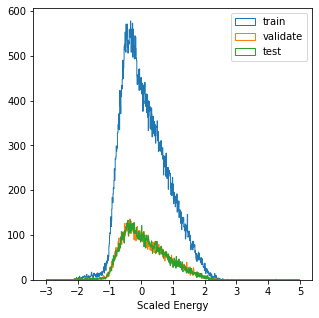

In [7]:
from sklearn.preprocessing import RobustScaler
fig = plt.figure(figsize=(5,5))
truth_scaler = RobustScaler().fit(np.array(data_train[truth_column]).reshape(-1,1)) # Fit only to training data

def transform_truth_array(scaler, array):
    return scaler.transform(np.array(array).reshape(-1,1))

bins = np.arange(-3,5,0.01)
plt.hist(transform_truth_array(truth_scaler, data_train[truth_column]), bins = bins, label = 'train', histtype = 'step');
plt.hist(transform_truth_array(truth_scaler, data_validate[truth_column]), bins = bins, label = 'validate', histtype = 'step');
plt.hist(transform_truth_array(truth_scaler, data_test[truth_column]), bins = bins, label = 'test', histtype = 'step');
plt.xlabel('Scaled Energy')
plt.legend()

    1.b) Train different regressors (linear, BDT, NN) to predict the value of interest given the inputs.

I'll just train the pytorch neural network here. See the other notebook for other algorithms.

Alright - let's now pack the data into pytorch datasets, so we can begin the training. You can read more about this here: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [8]:
import torch
from torch.utils.data import Dataset

class LHCDataset(Dataset):
    def __init__(self, input_data, scaled_truth):
        self._input_data = input_data
        self._scaled_truth = scaled_truth
        
    def __len__(self):
        return len(self._scaled_truth)

    def __getitem__(self, idx):
        return torch.tensor(self._input_data[idx], dtype = torch.float), torch.tensor(self._scaled_truth[idx],dtype = torch.float)
n_dimensions = 5
train_dataset = LHCDataset(input_data = data_train_transformed[:,0:n_dimensions], scaled_truth = transform_truth_array(truth_scaler,data_train[truth_column]))
validate_dataset = LHCDataset(input_data = data_validate_transformed[:,0:n_dimensions], scaled_truth = transform_truth_array(truth_scaler,data_validate[truth_column]))
test_dataset = LHCDataset(input_data = data_test_transformed[:,0:n_dimensions], scaled_truth = transform_truth_array(truth_scaler,data_test[truth_column]))

pytorch does not come with inbuilt functionality for training. One needs to write the training loops, early stopping and other functionality by hand. Having this freedom to design the training process to ones exact needs is awesome; but for simple tasks like ours, we can rely on an extension of pytorch called "pytorch-lightning" that has this inbuilt functionality. In order for it to work, we must have our neural network inherit from the "LightningModule". Let's define the neural network now

In [9]:
#!pip install --upgrade torch
#!pip install pytorch_lightning
#!pip install torchmetrics
import pytorch_lightning as pl
class Model(pl.LightningModule):
    def __init__(self, hidden_size, loss_func):
        super().__init__()
        self._loss_function = loss_func
        self.mlp1 = torch.nn.Linear(5,hidden_size)
        self.mlp2 = torch.nn.Linear(hidden_size,hidden_size)
        self.mlp3 = torch.nn.Linear(hidden_size,hidden_size)
        self.mlp4 = torch.nn.Linear(hidden_size,hidden_size)
        self.mlp5 = torch.nn.Linear(hidden_size,hidden_size)
        self.mlp6 = torch.nn.Linear(hidden_size,1)
        self.activation_function = torch.nn.LeakyReLU()

    def forward(self, batch):
        x, y = batch
        x = self.mlp1(x)
        x = self.activation_function(x)
        x = self.mlp2(x)
        x = self.activation_function(x)
        x = self.mlp3(x)
        x = self.activation_function(x)
        x = self.mlp4(x)
        x = self.activation_function(x)
        x = self.mlp5(x)
        x = self.activation_function(x)
        x = self.mlp6(x)
        return x

    def training_step(self, batch, batch_idx):
        _, y = batch
        x = self.forward(batch)
        loss = self._loss_function(x, y)
        # Logging to TensorBoard by default
        self.log("train_loss", loss)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

    def validation_step(self, batch, batch_idx):
        _, y = batch
        x = self.forward(batch)
        # Loss
        loss = self._loss_function(x, y)
        self.log("val_loss", loss)
    def predict_step(self, batch, batch_idx, dataloader_idx=0):
        return self(batch)

In the **__init__** function, we define the layers of our neural network and other member variables.  

**forward(self, batch)** defines how our data from the datasets ("batch") flows through the layers of the model. 

In  **training_step** we define how a training step looks like; first the data flows through the layers via "forward" and the output of the model is used to calculate a loss. pytorch-lightning takes care of the rest (back-propragation, optimization steps, etc.). 

In **configure_optimizers** we choose our optimization method. A common choice that fits most use cases is "adam". 

In **validation_step** we define how to calculate validation loss; this is similar to the training step. 

In **predict_step** we define the logic of predicting. "predicting" is when we ask the model, once it's trained, to predict on our test set. 

Alright - let's now define the central training parameters. We'll set the number of training epochs to 100, and the early stopping patience to 5. Patience of 5 means that the training will stop if no improvements on the validation loss is seen for 5 consequtive epochs. We'll set the batch_size to 1000 (decrease this if you have memory issues), which means the backpropagation will be made on 1000 examples at a time. Hidden_size defines the number of neurons in our hidden layer.

We then call torch.utils.data.DataLoader() on our datasets to transform them into iterable objects for training. A DataLoader is an object that calls the **__get_item__** function in our dataset class "batch_size" times. So when we call next(iter(train_dataloader)) we get a batch of examples. These batches are fed one at a time into model (called batch also in the model class). pytorch-lightning takes care of most of this data handling. 

Once the dataloaders are defined, one for each dataset, we setup the pytorch-lightning Trainer - which trains our model on the training dataset, and checks it's performance while training on the validation dataset. 

In [10]:
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping
from torch.nn import MSELoss

patience = 5
max_epochs = 100
batch_size = 5000
hidden_size = 1024
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
validate_dataloader = DataLoader(validate_dataset, batch_size = batch_size, shuffle = False)
test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False)
callbacks = [
        EarlyStopping(
            monitor="val_loss",
            patience=patience,
        ),
    ]

trainer = Trainer(
        max_epochs=max_epochs,
        callbacks=callbacks,
        log_every_n_steps=1,
    )
model_mse = Model(hidden_size = hidden_size, loss_func = MSELoss())
trainer.fit(model_mse, train_dataloader, validate_dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name                | Type      | Params
--------------------------------------------------
0 | _loss_function      | MSELoss   | 0     
1 | mlp1                | Linear    | 6.1 K 
2 | mlp2                | Linear    | 1.0 M 
3 | mlp3                | Linear    | 1.0 M 
4 | mlp4                | Linear    | 1.0 M 
5 | mlp5                | Linear    | 1.0 M 
6 | mlp6                | Linear    | 1.0 K 
7 | activation_function | LeakyReLU | 0     
--------------------------------------------------
4.2 M     Trainable params
0         Non-trainable params
4.2 M     Total params
16.822    Total estimated model params size (MB)


/groups/hep/pcs557/anaconda3/lib/python3.8/site-packages/pytorch_lightning-1.5.6-py3.8.egg/pytorch_lightning/trainer/data_loading.py:116: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/groups/hep/pcs557/anaconda3/lib/python3.8/site-packages/pytorch_lightning-1.5.6-py3.8.egg/pytorch_lightning/trainer/data_loading.py:116: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


OK. The training converged (early stopping kicked in) after 22 epochs. Let's now define a function that allows us to apply the model to our test set.

In [11]:
def get_predictions(trainer, model, dataloader):
    predictions = trainer.predict(model, dataloader)
    results = []
    for batch in predictions:
        results.extend(batch.numpy().tolist())
    return np.array(results)

Let's predict on the test set!

In [12]:
results = get_predictions(trainer, model_mse, test_dataloader)


/groups/hep/pcs557/anaconda3/lib/python3.8/site-packages/pytorch_lightning-1.5.6-py3.8.egg/pytorch_lightning/trainer/data_loading.py:116: UserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/groups/hep/pcs557/anaconda3/lib/python3.8/site-packages/pytorch_lightning-1.5.6-py3.8.egg/pytorch_lightning/loops/epoch/prediction_epoch_loop.py:172: UserWarning: Lightning couldn't infer the indices fetched for your dataloader.
  warning_cache.warn("Lightning couldn't infer the indices fetched for your dataloader.")


Let's now define a few plotting functions; this is quite similar to the other notebook.

In [13]:
def inverse_transform_truth(scaler, array):
    return array*scaler.scale_[0]+scaler.center_[0]

def calculate_energy_resolution(truth, prediction, scaler):
    bins = np.arange(1, np.log10(300000), 0.1)
    mean_energy = []
    resolution = []
    prediction = inverse_transform_truth(scaler,prediction)
    for i in range(len(bins)-1):
        index = (np.log10(truth)>= bins[i]) & (np.log10(truth)< bins[i+1])
        if sum(index)>0:
            mean_energy.append(np.log10(truth[index].mean()))
            residual_in_bin = (truth[index] - prediction[index])/truth[index] *100
            resolution.append((np.percentile(residual_in_bin,84) - np.percentile(residual_in_bin,16))/2)
    return mean_energy, resolution
def plot_residual(truth, prediction, scaler):
    bins = np.arange(4.5,6,0.05)
    truth = truth.to_numpy().reshape(-1,1)
    mean_energy, resolution = calculate_energy_resolution(truth, prediction,scaler)
    fig, ax = plt.subplots(1, 4, constrained_layout=True, figsize = (25,5))
    ax[0].hist(np.log10(truth), histtype = 'step', bins = bins, label = 'truth')
    ax[0].hist(np.log10(inverse_transform_truth(scaler,prediction)), histtype = 'step', bins = bins, label = 'prediction')
    ax[0].set_xlabel('Energy [log10 GeV]', size = 20)
    residual =(truth-inverse_transform_truth(scaler,prediction))/truth * 100
    ax[1].hist(residual, histtype = 'step', bins = np.arange(-100,100))
    ax[1].plot(np.repeat(0, 100), np.linspace(0, 1500, 100), color = 'black', lw = 0.2)
    ax[1].plot(np.repeat(np.percentile(residual,16),100), np.linspace(0, 1500, 100), color = 'red', lw = 0.2, label= '16th')
    ax[1].plot(np.repeat(np.percentile(residual,84),100), np.linspace(0, 1500, 100), color = 'green', lw = 0.2, label= '84th')
    ax[1].plot(np.repeat(0, 100), np.linspace(0, 1500, 100), color = 'black', lw = 0.2)
    ax[1].set_xlabel('Residual [%]', size = 20)
    ax[1].legend()
    ax[0].legend()
    ax[2].hist2d(inverse_transform_truth(scaler,prediction).squeeze(1), truth.squeeze(1), bins = 30, cmap = 'magma')
    ax[2].set_xlabel('Prediction [GeV]', size = 20)
    ax[2].plot(truth, truth, color = 'grey', ls = '--')
    ax[2].set_ylabel('Truth [GeV]', size = 20)
    ax[3].set_xlabel('True Energy [log10 GeV]', size = 20)
    ax[3].plot(mean_energy, resolution, ls = '--', label = 'resolution')
    ax3_extra = ax[3].twiny()
    ax3_extra.hist(np.log10(truth), histtype = 'step', bins = bins, label = 'True Distribution', color = 'black')
    ax[3].set_ylabel('Resolution [%]', size = 20)
    ax[3].set_xlim([4,6])
    ax[3].legend()
    
    return

Let's see the results!

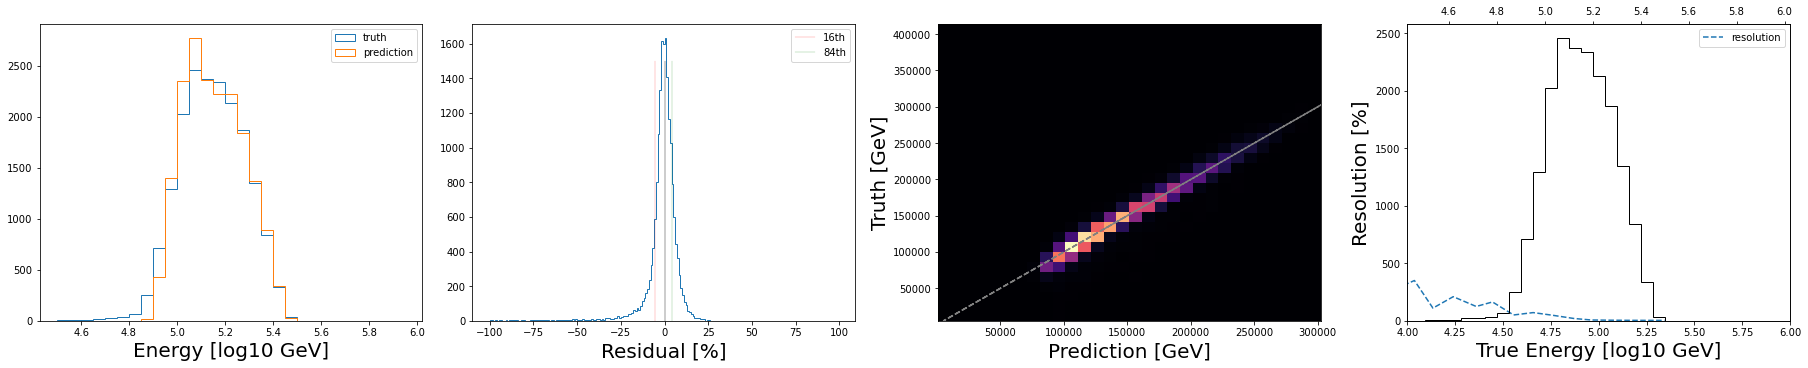

In [14]:
plot_residual(data_test[truth_column], results, truth_scaler)

**First plot from the left**; Here we see the distributions of the neural network compared to the distribution of the truth. Notice that the neural network produces unrealisticly many predictions around 5 log10 GeV. Comparing these two distributions are mainly useful to check for funny artifacts in the output of the neural network. If it was poorly trained, most predictions lie within a very narrow band (e.g. all predictions at 5 log10 GeV).

**Second plot from the left**; To estimate how wrong the neural network is, we can use the residual distribution, which is what's shown here. This plot shows the percentage error (truth-prediction)/truth. This is a common metric for regression evaluation when the true value cannot be 0 (which it can't for us). Ideally, for a perfect regressor, you'd have a delta-function at 0 - as it indicates 0% error. The black line at 0 is added to guide the eye - it's clear that the residual distribution is centered a bit below 0, indicating that the neural network tends to over-estimate the true energy when it's close to the truth. The long tail into the negative values show that there are over-estimated predictions - which is expected as the first plot the left shows very few estimates for the low energies. 

**third plot from the left** Here we plot the truth vs the predicted energy. It's clear that agreement in the lower energies and the higher energies isn't great. 

**fourth plot from the left** Here we plot the resolution (84th - 16th)/2 as a function of true energy. From this plot we can see for which energies the percentage error is smallest. I have also plotted the true distribution of energy for reference. Here we can see that the resolution is bad (high) at the low energies - which is not surprising when inspecting the first plot. We can also see that the model is worst where there is little statistics and very good where there is high statistics. This is a good plot to compare algorithms :-)  

    1.B) What happens if you use different loss functions? For example MSE vs MAE loss?

Let's try to train the neural network with the LogCosh loss function and MAE. We can then try to compare the models using the resolution plot.


In [15]:
from torch.nn import L1Loss
callbacks = [
        EarlyStopping(
            monitor="val_loss",
            patience=patience,
        ),
    ]

trainer = Trainer(
        max_epochs=max_epochs,
        callbacks=callbacks,
        log_every_n_steps=1,
    )
model_mae = Model(hidden_size = hidden_size, loss_func = L1Loss())
trainer.fit(model_mae, train_dataloader, validate_dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name                | Type      | Params
--------------------------------------------------
0 | _loss_function      | L1Loss    | 0     
1 | mlp1                | Linear    | 6.1 K 
2 | mlp2                | Linear    | 1.0 M 
3 | mlp3                | Linear    | 1.0 M 
4 | mlp4                | Linear    | 1.0 M 
5 | mlp5                | Linear    | 1.0 M 
6 | mlp6                | Linear    | 1.0 K 
7 | activation_function | LeakyReLU | 0     
--------------------------------------------------
4.2 M     Trainable params
0         Non-trainable params
4.2 M     Total params
16.822    Total estimated model params size (MB)


/groups/hep/pcs557/anaconda3/lib/python3.8/site-packages/pytorch_lightning-1.5.6-py3.8.egg/pytorch_lightning/trainer/data_loading.py:116: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/groups/hep/pcs557/anaconda3/lib/python3.8/site-packages/pytorch_lightning-1.5.6-py3.8.egg/pytorch_lightning/trainer/data_loading.py:116: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/groups/hep/pcs557/anaconda3/lib/python3.8/site-packages/pytorch_lightning-1.5.6-py3.8.egg/pytorch_lightning/trainer/data_loading.py:116: UserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


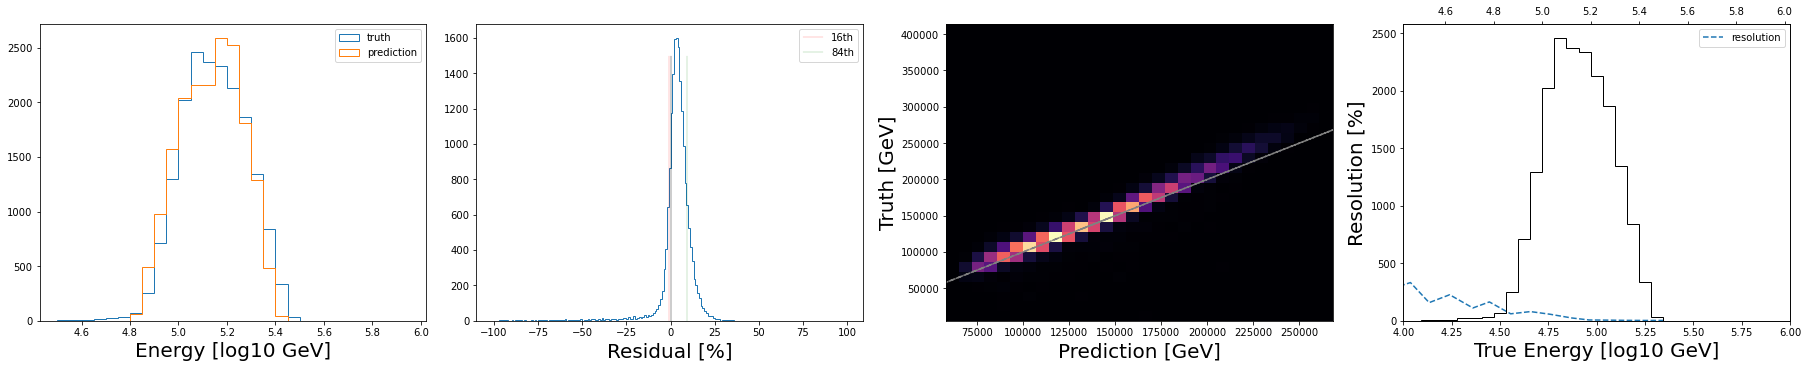

In [16]:
results_mae = get_predictions(trainer, model_mae, test_dataloader)
plot_residual(data_test[truth_column], results_mae, truth_scaler)

In [17]:
def LogCosh(x,y):
    return torch.mean(torch.log(torch.cosh(y-x)))
callbacks = [
        EarlyStopping(
            monitor="val_loss",
            patience=patience,
        ),
    ]

trainer = Trainer(
        max_epochs=max_epochs,
        callbacks=callbacks,
        log_every_n_steps=1,
    )
model_logcosh = Model(hidden_size = hidden_size, loss_func = LogCosh)
trainer.fit(model_logcosh, train_dataloader, validate_dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name                | Type      | Params
--------------------------------------------------
0 | mlp1                | Linear    | 6.1 K 
1 | mlp2                | Linear    | 1.0 M 
2 | mlp3                | Linear    | 1.0 M 
3 | mlp4                | Linear    | 1.0 M 
4 | mlp5                | Linear    | 1.0 M 
5 | mlp6                | Linear    | 1.0 K 
6 | activation_function | LeakyReLU | 0     
--------------------------------------------------
4.2 M     Trainable params
0         Non-trainable params
4.2 M     Total params
16.822    Total estimated model params size (MB)


/groups/hep/pcs557/anaconda3/lib/python3.8/site-packages/pytorch_lightning-1.5.6-py3.8.egg/pytorch_lightning/trainer/data_loading.py:116: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/groups/hep/pcs557/anaconda3/lib/python3.8/site-packages/pytorch_lightning-1.5.6-py3.8.egg/pytorch_lightning/trainer/data_loading.py:116: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/groups/hep/pcs557/anaconda3/lib/python3.8/site-packages/pytorch_lightning-1.5.6-py3.8.egg/pytorch_lightning/trainer/data_loading.py:116: UserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


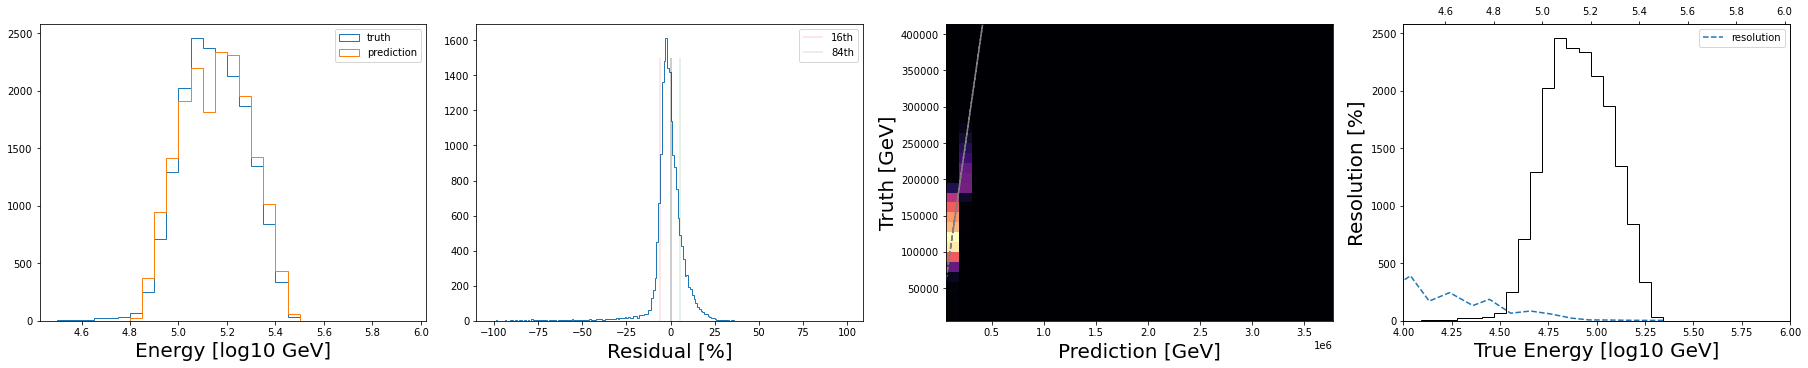

In [18]:
results_logcosh = get_predictions(trainer, model_logcosh, test_dataloader)
plot_residual(data_test[truth_column], results_logcosh, truth_scaler)

OK. Let's compare resolutions!

(0.0, 200.0)

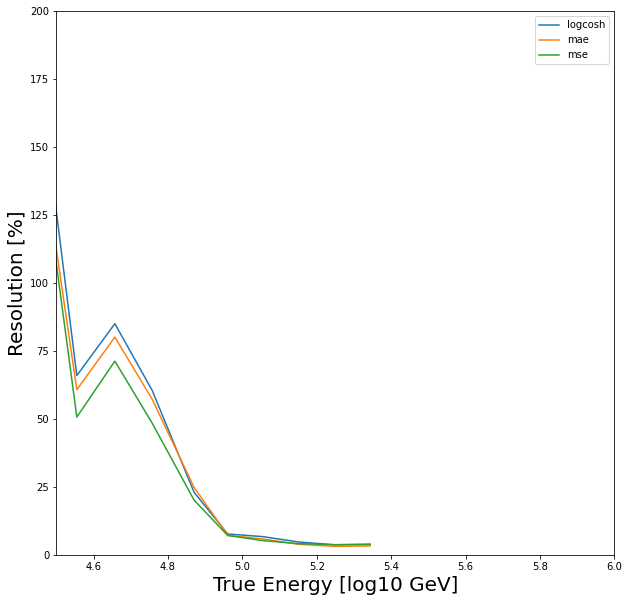

In [19]:
_, res_logcosh = calculate_energy_resolution(data_test[truth_column].to_numpy().reshape(-1,1), results_logcosh, truth_scaler)
_, res_mae = calculate_energy_resolution(data_test[truth_column].to_numpy().reshape(-1,1), results_mae, truth_scaler)
means, res_mse = calculate_energy_resolution(data_test[truth_column].to_numpy().reshape(-1,1), results, truth_scaler)

fig = plt.figure(figsize = (10,10))
plt.plot(means, res_logcosh, label ='logcosh', color = 'tab:blue')
plt.plot(means, res_mae, label ='mae', color = 'tab:orange')
plt.plot(means, res_mse, label ='mse', color = 'tab:green')
plt.legend()
plt.xlabel('True Energy [log10 GeV]', size = 20)
plt.ylabel('Resolution [%]', size = 20)
plt.xlim([4.5,6])
plt.ylim([0,200])

Seems like a tight race! You can read more about these loss functions (and others) here: https://heartbeat.comet.ml/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0